# Canny Edge Detector

Having seen how the Canny filter works in the 1-D case in the theoretical exercise, we now move onto the 2-D case. In 2-D, the gradient magnitude is a measure for the strength of an edge, while direction of the gradient vector gives edge orientation. Edge detection can be done by thresholding the gradient magnitude, though this generally results in thick contours which are poorly localized. To thin the contours into single-pixel-wide lines, one should use non-maximum suppression. Pixels in the contour are kept as edge pixels only if its gradient magnitude is greater than that of its two neighboring pixels in the direction orthogonal to the edge, i.e. where the gradient is a maximum.

In [1]:
import numpy as np
import scipy
import scipy.misc
from scipy.ndimage.filters import gaussian_filter,convolve
import matplotlib.pyplot as plt
from scipy import *
from scipy.ndimage import *
%matplotlib inline

/scratch_net/unclemax/lijingz/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
### Read Image ###
#im=scipy.misc.imread('/home/cvcourse/pics/zurlim.png',mode='F')
im=scipy.misc.imread('/scratch_net/unclemax/lijingz/MasterThesis/MPI-Sintel-complete/training/final/alley_1/frame_0001.png',mode='F')

/scratch_net/unclemax/lijingz/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(436, 1024)


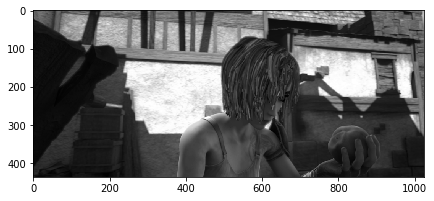

In [3]:
print im.shape
plt.figure(figsize=(7,7))
plt.imshow(im,cmap='gray')
plt.show()

## Gaussian Smooth Image

In [4]:
####### Gaussian Smooth Image #######
blurred_im = gaussian_filter(im, sigma=2,order=0,mode='reflect')
print blurred_im.shape

(436, 1024)


## Gradient Image: 
Normalize the gradient values in order to cover the full range of grey values.

In [5]:
###### Gradients x and y (Sobel filters) ######
im_x = convolve(blurred_im,[[-1,0,1],[-2,0,2],[-1,0,1]]) 
im_y = convolve(blurred_im,[[1,2,1],[0,0,0],[-1,-2,-1]])

## Orientation Map
At each pixel, the orientation of an edge can be obtained from the gradient.
Note that edge directions α and α + π are equivalent. The resulting directions can be coded as
grey values.

In [6]:
###### gradient and direction ########
gradient = np.power(np.power(im_x, 2.0) + np.power(im_y, 2.0), 0.5)
theta = np.arctan2(im_y, im_x)

## Edge image according to the threshold criteria
Each point whose absolute value of the gradient reaches a given threshold will be displayed.

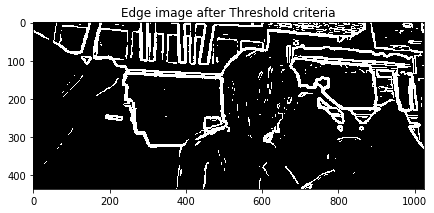

In [7]:
###### Parameters #####
thresh=50;
thresholdEdges = (gradient > thresh)
plt.figure(figsize=(7,7))
plt.title('Edge image after Threshold criteria')
plt.imshow(thresholdEdges,cmap='gray')
plt.show()

## Non-Maximum-Suppression
Each point, which is fulfilling the threshold criteria and has a larger edge strength than its direct neighboring pixels in the direction orthogonal to the edge, will be displayed.

In [8]:
###### Convert to degree ######
theta = 180 + (180/np.pi)*theta #

###### Quantize angles ######
x_0,y_0 = where(((theta<22.5)+(theta>157.5)*(theta<202.5)  +(theta>337.5)) == True)
x_45,y_45 = where(((theta>22.5)*(theta<67.5) +(theta>202.5)*(theta<247.5)) == True)
x_90,y_90 = where(((theta>67.5)*(theta<112.5) +(theta>247.5)*(theta<292.5)) == True)
x_135,y_135 = where(((theta>112.5)*(theta<157.5) +(theta>292.5)*(theta<337.5)) == True)

theta[x_0,y_0] = 0        # E-W
theta[x_45,y_45] = 1      # NE
theta[x_90,y_90] = 2      # N-S
theta[x_135,y_135] = 3    # NW

In [9]:
###### Non-maximum suppression ########
grad_supp = np.zeros((gradient.shape[0],gradient.shape[1]))
for r in range(im.shape[0]):
    for c in range(im.shape[1]):
        
        #Suppress pixels at the image edge
        if r == 0 or r == im.shape[0]-1 or c == 0 or c == im.shape[1] - 1:
            grad_supp[r, c] = 0
            continue
        
        ###### Thresholding #######
        if gradient[r, c]<thresh:
            grad_supp[r, c] = 0
            continue
        
        ######### NMS ##########
        tq = theta[r, c]
        if tq == 0: # E-W
            if gradient[r, c] >= gradient[r, c-1] and gradient[r, c] >= gradient[r, c+1]:
                grad_supp[r, c] = 1
        if tq == 1: # NE
            if gradient[r, c] >= gradient[r-1, c+1] and gradient[r, c] >= gradient[r+1, c-1]:
                grad_supp[r, c] = 1
        if tq == 2: # N-S (vertical)
            if gradient[r, c] >= gradient[r-1, c] and gradient[r, c] >= gradient[r+1, c]:
                grad_supp[r, c] = 1
        if tq == 3: # NW
            if gradient[r, c] >= gradient[r-1, c-1] and gradient[r, c] >= gradient[r+1, c+1]:
                grad_supp[r, c] = 1

In [10]:
###### Binary Thresholding #######
strongEdges = (grad_supp > 0)

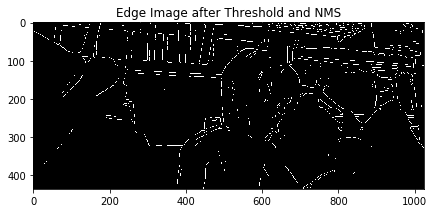

In [11]:
plt.figure(figsize=(7,7))
plt.title('Edge Image after Threshold and NMS')
plt.imshow(strongEdges,cmap='gray')
plt.show()

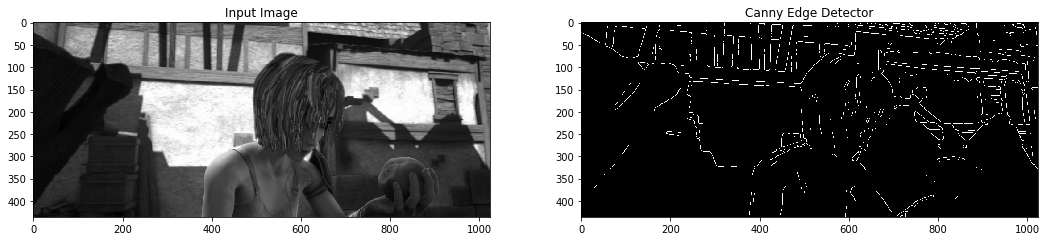

In [12]:
# Plotting of results
# No need to change it
f, ax_arr = plt.subplots(1, 2, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Canny Edge Detector")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(strongEdges, cmap='gray')